<a href="https://colab.research.google.com/github/jessebuyungo/yield_prediction/blob/main/Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fusets

In [ ]:
import fusets

In [ ]:
import ee
import geemap

In [ ]:
# 1. Authenticate and Initialize Earth Engine
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-jessebuyungo113')

print("Google Earth Engine initialized.")

Google Earth Engine initialized.


In [ ]:
# get csv
asset_id = 'projects/ee-jessebuyungo113/assets/combined_ndvi_timeseries.csv'
data= ee.FeatureCollection(asset_id )
print("Succes")

Succes


In [ ]:
import pandas as pd

In [ ]:

data = pd.read_csv('combined_ndvi_timeseries.csv')
data.head()
data = data.rename(columns={'date': 'time'})
data.head()

,NDVI,time
0,0.587209,2002-04-02
1,0.343599,2002-07-23
2,0.522270,2002-09-09
3,0.654978,2002-09-25
4,0.725925,2002-11-28


In [ ]:
import numpy as np

In [ ]:
numpy_dates = []
numpy_ndvi = []

for i in range(len(data)):
    m1= np.datetime64(data['time'][i])
    m2= np.array(data['NDVI'][i])
    numpy_dates.append(m1)
    numpy_ndvi.append(m2)
print(numpy_dates)


[numpy.datetime64('2002-04-02'), numpy.datetime64('2002-07-23'), numpy.datetime64('2002-09-09'), numpy.datetime64('2002-09-25'), numpy.datetime64('2002-11-28'), numpy.datetime64('2002-12-14'), numpy.datetime64('2003-01-31'), numpy.datetime64('2003-03-04'), numpy.datetime64('2003-04-05'), numpy.datetime64('2003-05-07'), numpy.datetime64('2003-10-14'), numpy.datetime64('2003-12-17'), numpy.datetime64('2004-02-19'), numpy.datetime64('2004-03-06'), numpy.datetime64('2004-03-22'), numpy.datetime64('2004-04-07'), numpy.datetime64('2004-05-25'), numpy.datetime64('2004-07-12'), numpy.datetime64('2004-09-14'), numpy.datetime64('2004-11-01'), numpy.datetime64('2004-11-17'), numpy.datetime64('2004-12-19'), numpy.datetime64('2005-01-04'), numpy.datetime64('2005-01-20'), numpy.datetime64('2005-02-05'), numpy.datetime64('2005-02-21'), numpy.datetime64('2005-03-25'), numpy.datetime64('2005-06-13'), numpy.datetime64('2005-07-15'), numpy.datetime64('2005-09-01'), numpy.datetime64('2005-10-03'), numpy.d

In [ ]:
import xarray as xr

In [ ]:
ndvi_xr = xr.DataArray(
    data=numpy_ndvi,  # or ndvi_np, ndvi_series.values
    coords={'time': numpy_dates}, # or dates_np_2, dates_series.values
    dims=['time'],
    name='NDVI' # Optional: gives the DataArray a name
)


ndvi_xs = xr.DataArray(
    data=numpy_ndvi,  # or ndvi_np, ndvi_series.values
    coords={'time': numpy_dates}, # or dates_np_2, dates_series.values
    dims=['time'],
    name='NDVI-2' # Optional: gives the DataArray a name
)

/tmp/ipython-input-957544761.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ndvi_xr = xr.DataArray(
/tmp/ipython-input-957544761.py:9: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of ti

In [ ]:
comb = xr.merge([ndvi_xr,ndvi_xs])

In [ ]:
from fusets import WhittakerTransformer as Tr

In [ ]:
transformer = Tr()



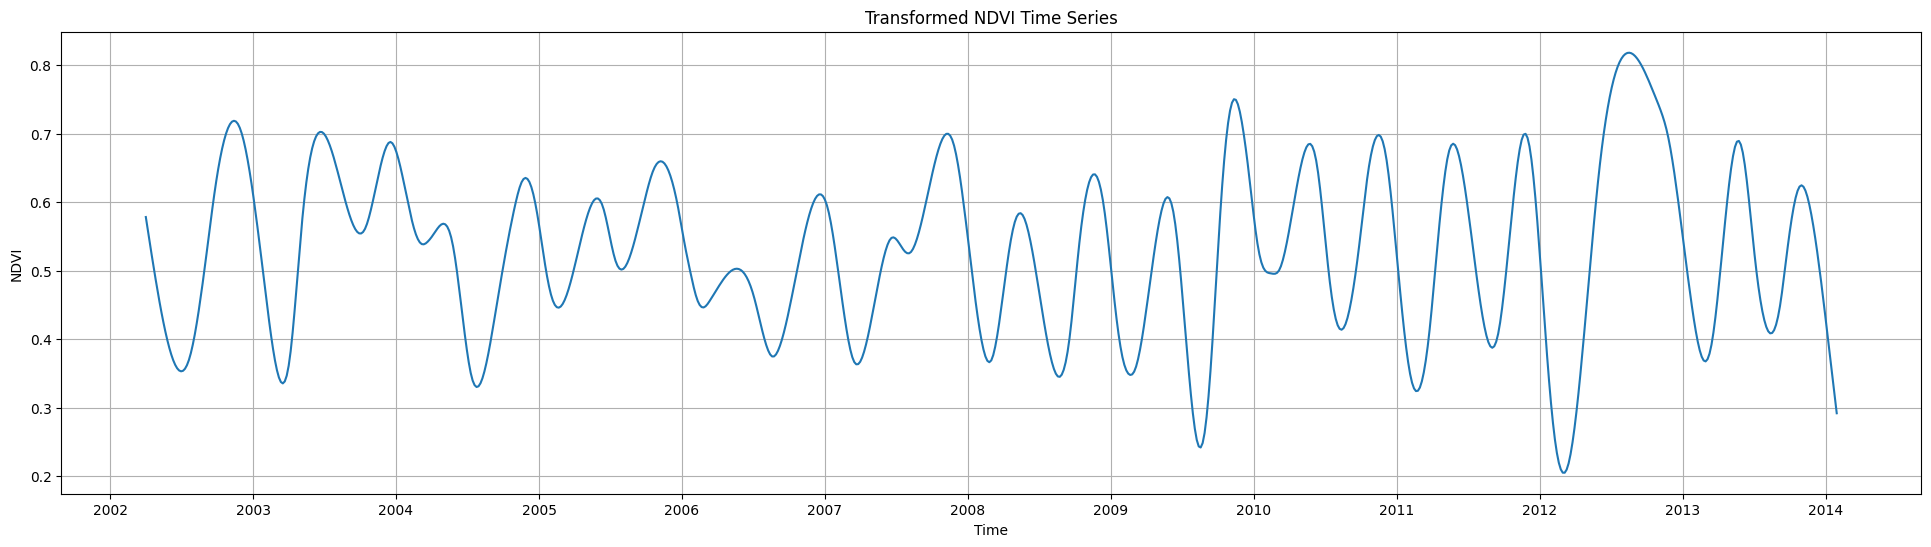

In [ ]:
transformed_X = transformer.fit_transform(ndvi_xr,smoothing_lambda=10000,prediction_period='P5D')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import mdates

# Plot the transformed NDVI data. Ensure 'transformed_X' is defined in a previous cell.
plt.figure(figsize=(24, 6))
transformed_X.plot()
plt.title('Transformed NDVI Time Series')


plt.xlabel('Time')
plt.ylabel('NDVI')
plt.grid(True)


# Set the x-axis to show yearly markings
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [ ]:
from fusets.analytics import phenology as ph

In [ ]:
result = ph(transformed_X)
result

Initialising calculation of phenometrics.

Beginning extraction of CRS metadata.
> Extracting CRS metadata.
> No CRS metadata found. Returning None.

Beginning calculation of phenometrics. This can take awhile - please wait.

Beginning calculation of peak of season (pos) values and times.
> Calculating peak of season (pos) values.
> Calculating peak of season (pos) times.
> Success!

Beginning calculation of valley of season (vos) values and times.
> Calculating valley of season (vos) values.
> Calculating valley of season (vos) times.
> Success!

Beginning calculation of middle of season (mos) values (times not possible).
> Calculating middle of season (mos) values.
> Success!

Beginning calculation of base (bse) values (times not possible).
> Calculating base (bse) values.
> Success!

Beginning calculation of amplitude of season (aos) values (times not possible).
> Calculating amplitude of season (aos) values.
> Success!

Beginning calculation of start of season (sos) values and time

<xarray.Dataset> Size: 72B
Dimensions:      ()
Data variables: (12/18)
    pos_values   float32 4B 0.8179
    pos_times    float32 4B 230.0
    mos_values   float32 4B 0.706
    vos_values   float32 4B 0.2049
    vos_times    float32 4B 65.0
    bse_values   float32 4B 0.2234
    ...           ...
    roi_values   float32 4B 0.003715
    rod_values   float32 4B 0.04285
    lios_values  float32 4B 211.5
    sios_values  float32 4B 118.0
    liot_values  float32 4B 456.5
    siot_values  float32 4B 263.5